In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, Y, alpha=0.1, epochs=10):
        X_ = np.ones((X.shape[0], X.shape[1]+1))
        X_[:, 1:] = X
        self.b = np.zeros((X_.shape[1]))
        
        for i in range(epochs):
            Y_ = np.dot(X_, self.b.T).reshape(-1, 1)
            grad = 2 * (Y - Y_) * X_
            self.b = self.b + alpha * np.mean(grad, axis=0)
            
    def predict(self, X):
        X_ = np.ones((X.shape[0], X.shape[1]+1))
        X_[:, 1:] = X
        Y_ = np.dot(X_, self.b.T).reshape(-1, 1)
        return Y_

In [3]:
df = pd.read_csv('salexpdata.csv')

df.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


In [4]:
df_train, df_test = train_test_split(df, test_size=0.2)

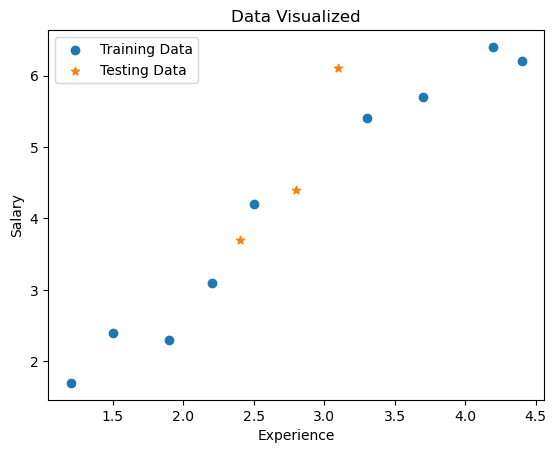

In [6]:
plt.scatter(df_train['experience'], df_train['salary'], label='Training Data')
plt.scatter(df_test['experience'], df_test['salary'], marker='*', label='Testing Data')
plt.title('Data Visualized')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [7]:
X_train, Y_train = df_train[['experience']].values, df_train[['salary']].values
X_test, Y_test = df_test[['experience']].values, df_test[['salary']].values

In [21]:
model = LinearRegression()
model.fit(X_train, Y_train, epochs=100)

In [22]:
Y_pred = model.predict(X_test)

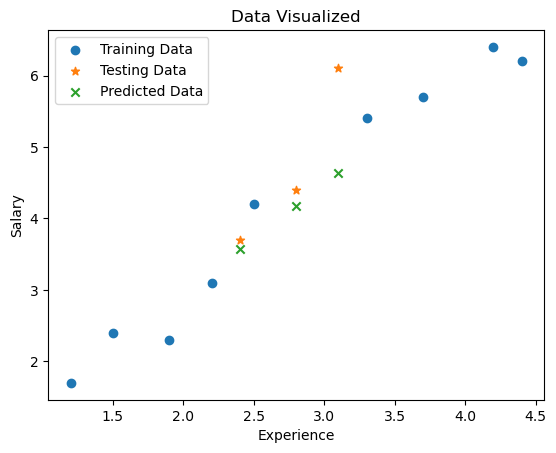

In [23]:
plt.scatter(df_train['experience'], df_train['salary'], label='Training Data')
plt.scatter(X_test, Y_test, marker='*', label='Testing Data')
plt.scatter(X_test, Y_pred, marker='x', label='Predicted Data')
plt.title('Data Visualized')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()